# Karaciğer Fibrozunun Tahmini İçin Makine Öğrenmesi Modeli


## Veri Setine Genel Bakış

In [52]:
import pandas as pd
import numpy as np 

df=pd.read_csv("HCV-Egy-Data.csv")
print(df.head())

   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       1   35      2               1          1          1   
1    46       1   29      1               2          2          1   
2    57       1   33      2               2          2          2   
3    49       2   33      1               2          1          2   
4    59       1   32      1               1          2          1   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   \
0                                 2          2                 2   
1                                 2          2                 1   
2                                 1          1                 1   
3                                 1          2                 1   
4                                 2          2                 2   

               ...               ALT 36  ALT 48  ALT after 24 w  RNA Base  \
0              ...                    5       5               5    655330   
1              ...    

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null float64
HGB                                 1385 non-null int64
Plat                                1385 non-null float64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null

In [54]:
# Veri Seti 1385 veriye sahip ve herhangi bir kayıp veri bulunmamakta


In [55]:
df.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [56]:
#Veri tiplerine bakıldığında bütün değerler int veya float olarak tanımlı

In [57]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


## MLPC Uygulaması




In [58]:
import numpy as np
import pandas as pd


In [59]:
print(df.head())

   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       1   35      2               1          1          1   
1    46       1   29      1               2          2          1   
2    57       1   33      2               2          2          2   
3    49       2   33      1               2          1          2   
4    59       1   32      1               1          2          1   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   \
0                                 2          2                 2   
1                                 2          2                 1   
2                                 1          1                 1   
3                                 1          2                 1   
4                                 2          2                 2   

               ...               ALT 36  ALT 48  ALT after 24 w  RNA Base  \
0              ...                    5       5               5    655330   
1              ...    

In [60]:
y=df["Baselinehistological staging"].values  ## Veri seti oluşturulurken isimlendirmede boşluklar olduğu için bu şekilde 
                                             ##   kullanıldı

x_data=df.drop(["Baselinehistological staging"],axis=1).values

In [61]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [62]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

mlpc_params={"activation":["relu","logistic","tanh","identity"],
             "alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)




Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1175 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.9min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
print(mlpc_cv_model.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (3, 5, 3), 'solver': 'lbfgs'}


In [64]:
mlpc_tuned=MLPClassifier(activation="relu",alpha=0.01,hidden_layer_sizes=(3,5,3),solver="lbfgs").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.24548736462093862


In [65]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(activation="relu",alpha=0.001,hidden_layer_sizes=(3,5,3),solver="lbfgs")

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.2014388489208633
0.2949640287769784
0.19424460431654678
0.2805755395683453
0.20863309352517986
0.2028985507246377
0.21014492753623187
0.2028985507246377
0.2971014492753623
0.2536231884057971
ortalama score: 0.23465227817745804


## Değerlendirme

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.23826714801444043


In [68]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        71
           2       0.22      0.59      0.32        56
           3       0.24      0.22      0.23        82
           4       0.29      0.22      0.25        68

   micro avg       0.24      0.24      0.24       277
   macro avg       0.19      0.26      0.20       277
weighted avg       0.19      0.24      0.19       277



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[ 0 34 25 12]
 [ 0 33 17  6]
 [ 0 45 18 19]
 [ 0 37 16 15]]


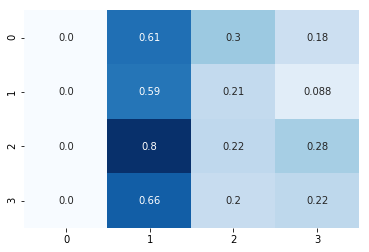

In [76]:

sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",fmt=".2")


In [73]:
import sklearn.metrics as metrics
f1=metrics.f1_score(y_test,y_pred, average='weighted')
print("f1 score:",f1)

f1 score: 0.1939090707454166


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Keras İle Uygulama

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [17]:
y=df["Baselinehistological staging"].values                         
x_data=df.drop(["Baselinehistological staging"],axis=1).values
print(y.shape)
print(x.shape)

(1385,)
(1385, 28)


In [18]:
x_train, x_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
print(x_train.shape)
print(y_train.shape)

(1108, 28)
(1108,)


In [20]:
input_shape=x_test[0].shape

In [45]:
model=Sequential()
model.add(Dense(16,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(28,activation="softmax"))

In [46]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [47]:
egitim=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 1108 samples, validate on 277 samples
Epoch 1/100
1108/1108 [==============================] - 4s - loss: 4.0776 - acc: 0.0505 - val_loss: 3.0527 - val_acc: 0.2022
Epoch 2/100
1108/1108 [==============================] - 0s - loss: 3.5261 - acc: 0.1327 - val_loss: 2.7144 - val_acc: 0.2022
Epoch 3/100
1108/1108 [==============================] - 0s - loss: 3.1071 - acc: 0.1841 - val_loss: 2.4077 - val_acc: 0.2022
Epoch 4/100
1108/1108 [==============================] - 0s - loss: 2.7213 - acc: 0.2076 - val_loss: 2.0296 - val_acc: 0.2058
Epoch 5/100
1108/1108 [==============================] - 0s - loss: 2.2820 - acc: 0.2527 - val_loss: 1.7786 - val_acc: 0.2022
Epoch 6/100
1108/1108 [==============================] - 0s - loss: 2.0229 - acc: 0.2554 - val_loss: 1.6476 - val_acc: 0.2022
Epoch 7/100
1108/1108 [==============================] - 0s - loss: 1.8478 - acc: 0.2626 - val_loss: 1.5467 - val_acc: 0.2022
Epoch 8/100
1108/1108 [==============================] - 0s - loss: 1.7

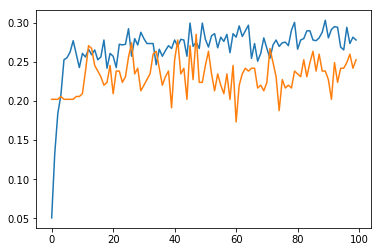

In [48]:
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

In [50]:
import sklearn.metrics as metrics

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred)
y_true=np.argmax(y_test)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

TypeError: Singleton array 3 cannot be considered a valid collection.